In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

consumo_max_min = pd.read_csv('./data/Max_y_min.csv')
consumo_año = pd.read_csv('./data/consumo_x_año.csv')



In [3]:
consumo_max_min_sorted = consumo_max_min.sort_values(by=['Country'],ascending=True)
consumo_año_sorted = consumo_max_min.sort_values(by=['Country'],ascending=True)

In [4]:
consumo_año.head()

,Unnamed: 0,Country,Data Source_x,Beverage Types,2016,2015,2014,2013,2012,2011,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
0,0,Afghanistan,Data source,All types,NaN,0.02,0.03,0.03,0.04,0.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1,Afghanistan,Data source,Beer,NaN,0.01,0.01,0.01,0.01,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2,Afghanistan,Data source,Wine,NaN,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,3,Afghanistan,Data source,Spirits,NaN,0.02,0.02,0.02,0.03,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,4,Afghanistan,Data source,Other alcoholic beverages,NaN,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [5]:
consumo_max_min.head()

,WHO Region Code,WHO Region,Country Code,Country,Year,Sex,Alcohol total per capita (15+) consumption in liters (numeric),Alcohol total per capita (15+) consumption in liters (low estimation),Alcohol total per capita (15+) consumption in liters (high estimation),Alcohol total per capita (15+) consumption in liters (string)
0,SEAR,South-East Asia,BGD,Bangladesh,2019,Both sexes,0.0,0.0,0.0,0 [0 – 0]
1,SEAR,South-East Asia,BGD,Bangladesh,2019,Female,0.0,0.0,0.0,0 [0 – 0]
2,SEAR,South-East Asia,BGD,Bangladesh,2019,Male,0.0,0.0,0.0,0 [0 – 0]
3,EMR,Eastern Mediterranean,KWT,Kuwait,2019,Both sexes,0.0,0.0,0.0,0 [0 – 0]
4,EMR,Eastern Mediterranean,KWT,Kuwait,2019,Female,0.0,0.0,0.0,0 [0 – 0]


In [6]:
consumo_max_min.columns

Index(['WHO Region Code', 'WHO Region', 'Country Code', 'Country', 'Year',
       'Sex', 'Alcohol total per capita (15+) consumption in liters (numeric)',
       'Alcohol total per capita (15+) consumption in liters (low estimation)',
       'Alcohol total per capita (15+) consumption in liters (high estimation)',
       'Alcohol total per capita (15+) consumption in liters (string)'],
      dtype='object')

In [7]:
consumo_año.columns

Index(['Unnamed: 0', 'Country', 'Data Source_x', 'Beverage Types', '2016',
       '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007',
       '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998',
       '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989',
       '1988', '1987', '1986', '1985', '1984', '1983', '1982', '1981', '1980',
       '1979', '1978', '1977', '1976', '1975', '1974', '1973', '1972', '1971',
       '1970', '1969', '1968', '1967', '1966', '1965', '1964', '1963', '1962',
       '1961', '1960'],
      dtype='object')

In [8]:
clean_consumo_año = consumo_año.filter(['Unnamed: 0', 'Country', 'Beverage Types',
       '2015', '2014', '2013', '2012', '2011', '2010'])
clean_consumo_año

,Unnamed: 0,Country,Beverage Types,2015,2014,2013,2012,2011,2010
0,0,Afghanistan,All types,0.02,0.03,0.03,0.04,0.04,0.03
1,1,Afghanistan,Beer,0.01,0.01,0.01,0.01,0.01,0.01
2,2,Afghanistan,Wine,0.00,0.00,0.00,0.00,0.00,0.00
3,3,Afghanistan,Spirits,0.02,0.02,0.02,0.03,0.03,0.02
4,4,Afghanistan,Other alcoholic beverages,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
980,979,Zimbabwe,All types,3.55,3.44,3.34,3.45,3.34,2.92
981,980,Zimbabwe,Beer,2.23,2.12,2.05,2.07,2.05,1.67
982,981,Zimbabwe,Wine,0.05,0.05,0.13,0.09,0.13,0.10
983,982,Zimbabwe,Spirits,0.43,0.43,0.32,0.44,0.32,0.34


In [9]:
clean_consumo_max_min = consumo_max_min.filter(['WHO Region Code', 'WHO Region', 'Country Code', 'Country', 'Year',
       'Sex', 'Alcohol total per capita (15+) consumption in liters (numeric)'])
clean_consumo_max_min

,WHO Region Code,WHO Region,Country Code,Country,Year,Sex,Alcohol total per capita (15+) consumption in liters (numeric)
0,SEAR,South-East Asia,BGD,Bangladesh,2019,Both sexes,0.00
1,SEAR,South-East Asia,BGD,Bangladesh,2019,Female,0.00
2,SEAR,South-East Asia,BGD,Bangladesh,2019,Male,0.00
3,EMR,Eastern Mediterranean,KWT,Kuwait,2019,Both sexes,0.00
4,EMR,Eastern Mediterranean,KWT,Kuwait,2019,Female,0.00
...,...,...,...,...,...,...,...
11233,AFR,Africa,SLE,Sierra Leone,2000,Male,9.54
11234,AFR,Africa,ZAF,South Africa,2000,Both sexes,9.56
11235,WPR,Western Pacific,NRU,Nauru,2000,Male,9.66
11236,AMR,Americas,PRY,Paraguay,2000,Male,9.82


In [10]:
beer_df = clean_consumo_año.loc[clean_consumo_año['Beverage Types'] == 'Beer'].sort_values(by = ['2015'], ascending= False).head()
beer_df

,Unnamed: 0,Country,Beverage Types,2015,2014,2013,2012,2011,2010
276,276,Equatorial Guinea,Beer,8.17,8.39,8.67,7.82,7.21,6.05
791,785,Seychelles,Beer,7.92,6.73,6.48,5.49,4.83,2.71
316,316,Gabon,Beer,7.28,7.25,6.20,5.81,5.78,5.94
226,226,Czechia,Beer,6.90,7.15,7.15,7.15,6.79,6.79
496,495,Lithuania,Beer,6.28,6.45,6.71,6.60,6.48,5.93


In [11]:
wine_df = clean_consumo_año.loc[clean_consumo_año['Beverage Types'] == 'Wine'].sort_values(by = ['2015'], ascending= False).head()
wine_df

,Unnamed: 0,Country,Beverage Types,2015,2014,2013,2012,2011,2010
312,312,France,Wine,7.09,7.04,7.13,7.33,7.41,7.27
707,706,Portugal,Wine,6.54,6.38,6.50,6.76,7.43,7.47
502,501,Luxembourg,Wine,5.47,5.23,5.34,5.40,5.44,5.28
727,726,Republic of Moldova,Wine,5.25,4.84,4.85,4.86,3.58,2.59
812,806,Slovenia,Wine,4.90,4.73,4.09,5.50,4.81,4.85


In [12]:
spirits_df = clean_consumo_año.loc[clean_consumo_año['Beverage Types'] == 'Spirits'].sort_values(by = ['2015'], ascending= False).head()
spirits_df

,Unnamed: 0,Country,Beverage Types,2015,2014,2013,2012,2011,2010
288,288,Estonia,Spirits,8.37,8.70,8.93,8.53,8.18,7.53
373,373,Haiti,Spirits,5.65,5.65,5.65,5.65,5.57,5.65
498,497,Lithuania,Spirits,5.35,5.50,5.62,5.62,5.52,5.05
128,128,Bulgaria,Spirits,4.99,4.76,4.87,4.98,5.16,5.02
758,752,Saint Lucia,Spirits,4.87,4.78,4.67,5.04,5.33,5.55


In [13]:
consumo_region_max = clean_consumo_max_min.groupby('WHO Region')['Alcohol total per capita (15+) consumption in liters (numeric)'].max()
consumo_region =pd.DataFrame(consumo_region_max)
consumo_region_sorted = consumo_region.sort_values(by='Alcohol total per capita (15+) consumption in liters (numeric)', ascending=False).head()
consumo_region_sorted

,Alcohol total per capita (15+) consumption in liters (numeric)
WHO Region,
Europe,31.44
Africa,25.72
Western Pacific,19.50
Americas,18.71
South-East Asia,14.57


In [14]:
consumo_pais_max = clean_consumo_max_min.groupby('Country')['Alcohol total per capita (15+) consumption in liters (numeric)'].max()
consumo_pais = pd.DataFrame(consumo_pais_max)
consumo_pais_sorted = consumo_pais.sort_values(by='Alcohol total per capita (15+) consumption in liters (numeric)', ascending=False).head()
consumo_pais_sorted

,Alcohol total per capita (15+) consumption in liters (numeric)
Country,
Romania,31.44
Russian Federation,28.48
Estonia,26.84
Lithuania,26.46
Montenegro,26.45


In [15]:
consumo_genero_filter = clean_consumo_max_min.loc[clean_consumo_max_min['Sex'].isin(['Male', 'Female'])]
consumo_genero_año = pd.pivot_table(consumo_genero_filter, index='Sex', columns='Year', values='Alcohol total per capita (15+) consumption in liters (numeric)', aggfunc='sum')
consumo_genero_año

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Sex,,,,,,,,,,,,,,,,,,,,
Female,472.534,472.534,471.051,470.766,474.944,480.841,487.351,502.674,495.885,488.228,482.874,486.023,486.114,483.628,479.426,477.104,474.743,473.128,471.841,471.841
Male,1727.464,1727.464,1720.035,1715.033,1725.550,1741.567,1759.787,1812.459,1791.947,1773.052,1761.372,1776.102,1777.592,1772.727,1761.897,1757.760,1752.460,1748.470,1744.968,1744.968


In [19]:
consumo_genero_año.columns

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='Year')

In [24]:
columnas_deseadas = [2010, 2011, 2012, 2013, 2014, 2015]
consumo_genero_grafica = consumo_genero_año.loc[:, columnas_deseadas]
consumo_genero_grafica

Year,2010,2011,2012,2013,2014,2015
Sex,,,,,,
Female,482.874,486.023,486.114,483.628,479.426,477.104
Male,1761.372,1776.102,1777.592,1772.727,1761.897,1757.760


<function matplotlib.pyplot.show(close=None, block=None)>

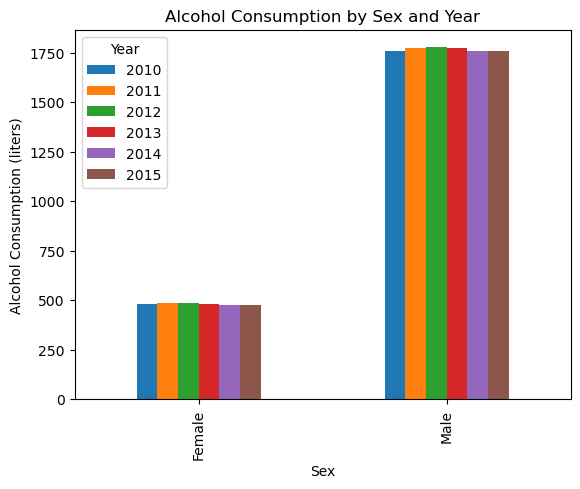

In [25]:
consumo_genero_grafica.plot(kind='bar')

plt.xlabel('Sex')
plt.ylabel('Alcohol Consumption (liters)')
plt.title('Alcohol Consumption by Sex and Year')
plt.savefig('Grafico consumo genero año.png')
plt.show

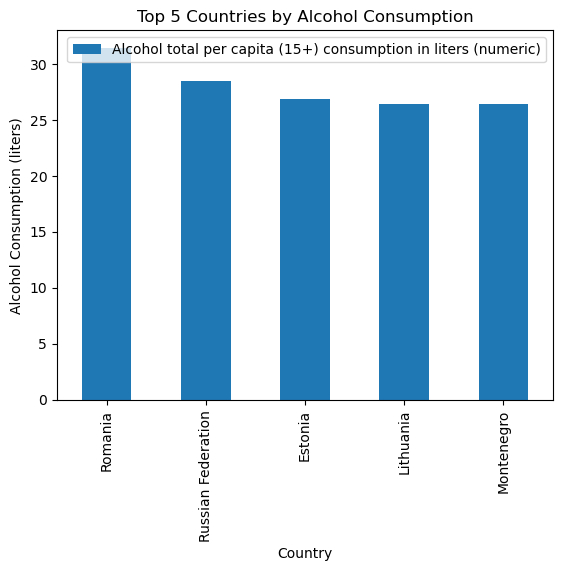

In [30]:
consumo_pais_sorted.plot(kind='bar')

plt.xlabel('Country')
plt.ylabel('Alcohol Consumption (liters)')
plt.title('Top 5 Countries by Alcohol Consumption')
plt.savefig('Grafico consumo pais.png')

plt.show()

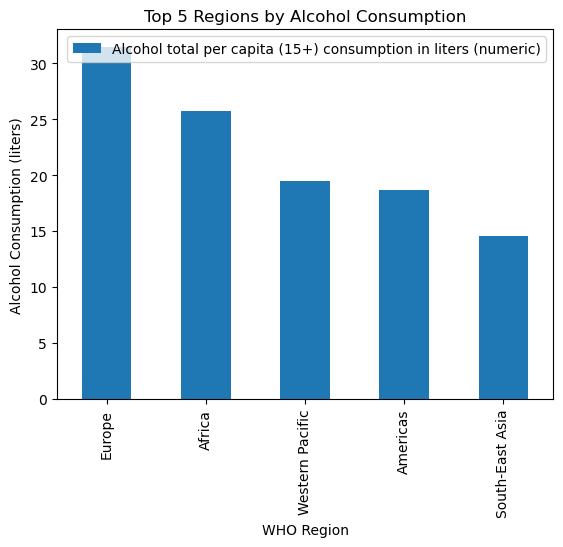

In [31]:
consumo_region_sorted.plot(kind='bar')

plt.xlabel('WHO Region')
plt.ylabel('Alcohol Consumption (liters)')
plt.title('Top 5 Regions by Alcohol Consumption')
plt.savefig('Grafico consumo Region.png')

plt.show()

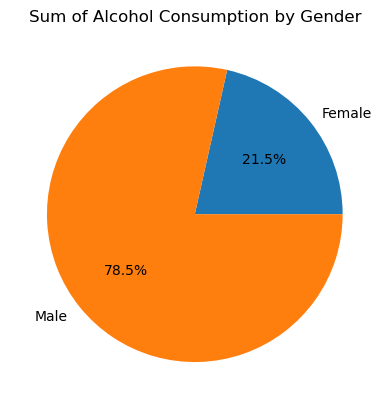

In [33]:
grafica_consumo_genero_pie = pd.DataFrame(clean_consumo_max_min)
filtered_data = clean_consumo_max_min[clean_consumo_max_min['Sex'].isin(['Female', 'Male'])]
suma_consumo = filtered_data.groupby('Sex')['Alcohol total per capita (15+) consumption in liters (numeric)'].sum()
plt.pie(suma_consumo, labels=suma_consumo.index, autopct='%1.1f%%')
plt.title('Sum of Alcohol Consumption by Gender')
plt.savefig('Grafico consumo genero PIE.png')
plt.show()